In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import cufflinks as cf


In [2]:
Oct_2020 = pd.read_csv('202010-divvy-tripdata.csv')
Nov_2020 = pd.read_csv('202011-divvy-tripdata.csv')
Dec_2020 = pd.read_csv('202012-divvy-tripdata.csv')
Jan_2021 = pd.read_csv('202101-divvy-tripdata.csv')
Feb_2021 = pd.read_csv('202102-divvy-tripdata.csv')
Mar_2021 = pd.read_csv('202103-divvy-tripdata.csv')
Apl_2021 = pd.read_csv('202104-divvy-tripdata.csv')
May_2021 = pd.read_csv('202105-divvy-tripdata.csv')
Jun_2021 = pd.read_csv('202106-divvy-tripdata.csv')
Jul_2021 = pd.read_csv('202107-divvy-tripdata.csv')
Aug_2021 = pd.read_csv('202108-divvy-tripdata.csv')
Sep_2021 = pd.read_csv('202109-divvy-tripdata.csv')

In [3]:
df = pd.concat([Oct_2020,Nov_2020,Dec_2020,Jan_2021,Feb_2021,Mar_2021,Apl_2021,May_2021,Jun_2021,Jul_2021,Aug_2021,Sep_2021], ignore_index = True)

In [4]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313.0,Rush St & Hubbard St,125.0,41.926101,-87.638977,41.890345,-87.626068,casual
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227.0,Kedzie Ave & Milwaukee Ave,260.0,41.948172,-87.663911,41.929528,-87.707818,casual
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,Stony Island Ave & 67th St,102.0,University Ave & 57th St,423.0,41.773462,-87.585372,41.791455,-87.600050,casual
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,Clark St & Grace St,165.0,Broadway & Sheridan Rd,256.0,41.950855,-87.659244,41.952809,-87.650103,casual
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,Southport Ave & Wrightwood Ave,190.0,Stave St & Armitage Ave,185.0,41.928857,-87.663962,41.917777,-87.691434,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5136256,FA66BCAB0D73DDC2,classic_bike,2021-09-22 15:46:57,2021-09-22 16:01:15,Ellis Ave & 83rd St,584,Stony Island Ave & 75th St,KA1503000019,41.744123,-87.599034,41.758670,-87.586883,casual
5136257,1D44DEFB5D36CA04,classic_bike,2021-09-25 16:25:23,2021-09-25 16:40:29,Ellis Ave & 60th St,KA1503000014,Shore Dr & 55th St,TA1308000009,41.785097,-87.601073,41.795212,-87.580715,casual
5136258,6A346EA57FC23C45,classic_bike,2021-09-25 16:26:05,2021-09-25 16:40:30,Ellis Ave & 60th St,KA1503000014,Shore Dr & 55th St,TA1308000009,41.785097,-87.601073,41.795212,-87.580715,casual
5136259,49360AFD771100A6,classic_bike,2021-09-15 17:57:48,2021-09-15 18:24:06,Ellis Ave & 60th St,KA1503000014,Shore Dr & 55th St,TA1308000009,41.785097,-87.601073,41.795212,-87.580715,casual


In [5]:
df = df.drop(columns=['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])

df.tail()

#remove irrelevent columns 

,ride_id,rideable_type,started_at,ended_at,member_casual
5136256,FA66BCAB0D73DDC2,classic_bike,2021-09-22 15:46:57,2021-09-22 16:01:15,casual
5136257,1D44DEFB5D36CA04,classic_bike,2021-09-25 16:25:23,2021-09-25 16:40:29,casual
5136258,6A346EA57FC23C45,classic_bike,2021-09-25 16:26:05,2021-09-25 16:40:30,casual
5136259,49360AFD771100A6,classic_bike,2021-09-15 17:57:48,2021-09-15 18:24:06,casual
5136260,343190A2DC023FED,electric_bike,2021-09-11 18:01:06,2021-09-11 18:08:26,member


In [6]:
df['started_at'] = df['started_at'].astype('datetime64')
df['ended_at'] = df['ended_at'].astype('datetime64')
# Coverting datatype of "started_at" & "ended_at" columns to "datetime64" type.

In [7]:
df['ride_length'] = (df['ended_at'] - df['started_at'])/pd.Timedelta(minutes=1)
df['ride_length'] = df['ride_length'].astype('int32')

# Creating New Column "ride_length" and changing its datatype to "int32"
# In this column, each row contains the difference between "starting time" and "ending time" columns in minutes.

df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,casual,17
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,casual,14
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,casual,8
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,casual,2
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,casual,16


In [8]:
df.sort_values(by = 'ride_length')

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
709532,3ED2B8BCE6A914EF,electric_bike,2020-12-15 12:10:14,2020-11-25 08:00:16,member,-29049
675177,6DF34F98F5DB335F,electric_bike,2020-12-15 11:35:39,2020-11-25 07:40:56,member,-29034
674334,BE1F691E387D7072,docked_bike,2020-12-15 11:34:23,2020-11-25 08:00:15,member,-29014
736227,321F7AE3AEDBAA13,docked_bike,2020-12-15 12:12:43,2020-11-25 08:42:16,member,-29010
739257,BB4697B59E3FF12A,docked_bike,2020-12-15 11:34:38,2020-11-25 08:09:43,member,-29004
...,...,...,...,...,...,...
3393698,99415B003B7E7EEE,docked_bike,2021-07-08 19:29:49,2021-08-11 21:56:58,casual,49107
2105470,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,casual,52701
1538445,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,casual,53921
2569233,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,casual,55691


In [9]:
# Its seen that many rows in some months contained negative values. 
# Such errors happened because the "ending time" is earlier than the "starting time" in their respective rows.

df[df['ride_length'] < 0].count()

# Number of rows containing Negative Values.

ride_id          971
rideable_type    971
started_at       971
ended_at         971
member_casual    971
ride_length      971
dtype: int64

In [10]:
df[df['ride_length'] < 1].count()

# Number of rows containing "ride length" less than "1" minute.

ride_id          80845
rideable_type    80845
started_at       80845
ended_at         80845
member_casual    80845
ride_length      80845
dtype: int64

In [11]:
df = df[df['ride_length'] >= 1]
df = df.reset_index()
df = df.drop(columns=['index'])

# Removing 80845 rows containing negative values & ride length less than 1 minute. 
# Any trips that were below 60 seconds in length are potentially false starts or users trying to re-dock a bike to ensure it was secure.

df

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,casual,17
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,casual,14
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,casual,8
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,casual,2
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,casual,16
...,...,...,...,...,...,...
5055411,FA66BCAB0D73DDC2,classic_bike,2021-09-22 15:46:57,2021-09-22 16:01:15,casual,14
5055412,1D44DEFB5D36CA04,classic_bike,2021-09-25 16:25:23,2021-09-25 16:40:29,casual,15
5055413,6A346EA57FC23C45,classic_bike,2021-09-25 16:26:05,2021-09-25 16:40:30,casual,14
5055414,49360AFD771100A6,classic_bike,2021-09-15 17:57:48,2021-09-15 18:24:06,casual,26


<AxesSubplot:xlabel='member_casual', ylabel='ride_length'>

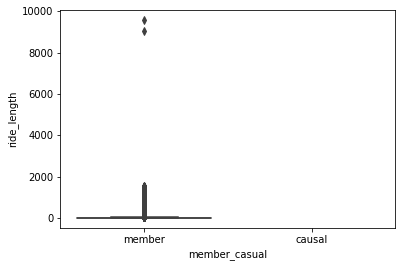

In [12]:
sns.boxplot(data=df,x='member_casual',y='ride_length',order=['member','causal'])

In [13]:
df = df.astype({'ride_id':'string', 'rideable_type':'category', 'member_casual':'category'})

df.info()

# Coverting datatypes of each columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5055416 entries, 0 to 5055415
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        string        
 1   rideable_type  category      
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  category      
 5   ride_length    int32         
dtypes: category(2), datetime64[ns](2), int32(1), string(1)
memory usage: 144.6 MB


In [14]:
df.shape

(5055416, 6)

In [15]:
df.isna().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
ride_length      0
dtype: int64

In [16]:
df['ride_id']=df['ride_id'].str.strip()

#removing leading and trailing whitespaces from the dataset

In [17]:
df[df['ride_id'].duplicated()]

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length


In [18]:
from pandas.api.types import CategoricalDtype

# ANALYSE AND SHARE 

In [19]:
df['year'] = df['started_at'].dt.year

cats1 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = df['started_at'].dt.month_name()
df['month'] = df['month'].astype(CategoricalDtype(categories=cats1, ordered=False))

cats2 = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['day_of_week'] = df['started_at'].dt.day_name()
df['day_of_week'] = df['day_of_week'].astype(CategoricalDtype(categories=cats2, ordered=False))

df['hour'] = df['started_at'].dt.hour

df = df.astype({'year':'int16', 'hour':'int8'})

# Creating new columns "year", "month", "day_of_week", "hour" and Converting datatypes.

df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,year,month,day_of_week,hour
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,casual,17,2020,October,Saturday,19
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,casual,14,2020,October,Saturday,23
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,casual,8,2020,October,Saturday,23
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,casual,2,2020,October,Saturday,22
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,casual,16,2020,October,Saturday,19


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5055416 entries, 0 to 5055415
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        string        
 1   rideable_type  category      
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  category      
 5   ride_length    int32         
 6   year           int16         
 7   month          category      
 8   day_of_week    category      
 9   hour           int8          
dtypes: category(4), datetime64[ns](2), int16(1), int32(1), int8(1), string(1)
memory usage: 168.7 MB


# Analyzing the Difference in Number of Rides Between Casual riders and Members.

#total number of rides in one year 

In [21]:
pd.pivot_table(df,
              index = 'member_casual',
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

,count
,ride_id
member_casual,
casual,2325255
member,2730161
Total Count,5055416


In [22]:
fig_1=df.groupby('member_casual',as_index=False).count()
fig_1

,member_casual,ride_id,rideable_type,started_at,ended_at,ride_length,year,month,day_of_week,hour
0,casual,2325255,2325255,2325255,2325255,2325255,2325255,2325255,2325255,2325255
1,member,2730161,2730161,2730161,2730161,2730161,2730161,2730161,2730161,2730161


In [23]:
px.bar(fig_1,y='member_casual',x='ride_id',range_x=[0,3000000],
      color='member_casual',
      height=300,
       text='ride_id',
      labels={'ride_id':'No Of rides','member_casual':'member/Casual'},
      hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

# number of rides in one month

In [24]:
df_pv1=pd.pivot_table(df,
                     index=['year','month','member_casual'],
                     values='ride_id',
                     aggfunc=['count'],
                     margins=True,
                     margins_name='Total count')
df_pv1 = df_pv1.loc[(df_pv1 != 0).any(axis=1)]
df_pv1

count
                                     ride_id
year        month     member_casual         
2020        October   casual          141922
                      member          237996
            November  casual           86730
                      member          168432
            December  casual           29665
                      member           99832
2021        January   casual           17842
                      member           77573
            February  casual            9964
                      member           38685
            March     casual           83148
                      member          142375
            April     casual          134945
                      member          197477
            May       casual          253346
                      member          269897
            June      casual          365023
                      member          352676
            July      casual          435927
                      member          373833
            August    casual          407517
                      member          385426
            September casual          359226
                      member          385959
Total count                          5055416

In [25]:
fig_2=df.groupby(['year','month','member_casual'],as_index=False).count()
fig_2=fig_2[fig_2['ride_id']!=0]


px.line(fig_2,x='month',y='ride_id',range_y=[0,450000],
       color='member_casual',
       line_shape='spline',
       markers=True,
       labels = {'ride_id': 'No. of Rides', 'month': 'Months (Oct 2020 - Sep 2021)', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': True, 'ride_id': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})


1.It shows that the total number of rides fall during winter season and rise during summer season.

2.The behaviour of casual riders and members tend to be the same as the season changes.

3.Maximum riders are using bikes in summer season.

4.Casual riders overtake members during summer.

# Average Number of Rides in Each Weekday

In [26]:
pd.pivot_table(df,
              index = ['day_of_week', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

count
                           ride_id
day_of_week member_casual         
Sunday      casual          438983
            member          338729
Monday      casual          262801
            member          369604
Tuesday     casual          247964
            member          400504
Wednesday   casual          253591
            member          416172
Thursday    casual          270844
            member          413808
Friday      casual          334363
            member          398689
Saturday    casual          516709
            member          392655
Total Count                5055416

In [27]:
fig_3 = df.groupby(['day_of_week', 'member_casual'], as_index=False).count()
  
px.line(fig_3, x = 'day_of_week', y = 'ride_id', range_y = [0,550000],
        color = 'member_casual',  
        line_shape = 'spline',
        markers=True,
        labels = {'ride_id': 'No. of Rides', 'day_of_week': 'Weekdays', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})
          
    


1.Here it shows more casual riders are using bike share on WEEKENDS (ie., Saturdays and Sundays).

2.But there are a fixed number of casual riders using on WEEKDAYS, might be commuting.

3.While the number of members riding tend to be same almost daily.

# Average Number of Rides in Each Hour

In [28]:
pd.pivot_table(df,
               index=['hour','member_casual'],
              values='ride_id',
              aggfunc=['count'],
              margins=True,
              margins_name='total_count')

count
                           ride_id
hour        member_casual         
0           casual           47827
            member           27119
1           casual           34357
            member           17594
2           casual           21917
            member           10024
3           casual           12154
            member            5740
4           casual            8646
            member            6904
5           casual           10705
            member           25904
6           casual           22642
            member           74074
7           casual           40284
            member          131985
8           casual           55570
            member          147646
9           casual           67683
            member          114296
10          casual           94645
            member          114944
11          casual          124632
            member          140341
12          casual          151021
            member          164354
13          casual          162151
            member          161708
14          casual          168013
            member          160614
15          casual          176694
            member          182284
16          casual          192608
            member          232365
17          casual          221084
            member          288402
18          casual          198252
            member          245191
19          casual          153242
            member          174298
20          casual          112847
            member          115596
21          casual           94234
            member           82733
22          casual           87153
            member           62817
23          casual           66894
            member           43228
total_count                5055416

In [29]:
fig_4=df.groupby(['hour','member_casual'],as_index=False).count()
fig_4a = px.line(fig_4, x = 'hour', y = 'ride_id', range_x = [0,23], range_y = [0,300000],
                 color = 'member_casual',
                 line_shape = 'spline',
                 markers=True,
                 labels = {'ride_id': 'No. of Rides', 'hour': '24 Hours', 'member_casual': 'Member/Casual'},
                 hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True},
                 color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})
fig_4a.update_xaxes(dtick=1)
fig_4a.show()


1.In a day, casual riders and members use bike share more during AFTERNOON, peak use during EVENING .

2.While in the MORNING time, the number of CASUAL MEMBER are way less than the MEMBERS.

# Analyzing Difference in Average Ride Length Between Casual riders and Members.

# #Average Ride Length in 1 Year

In [30]:
pd.pivot_table(df,
              index='member_casual',
              values='ride_length',
              aggfunc=['mean'],
              margins=True,
              margins_name='Total Ride Average')

,mean
,ride_length
member_casual,
casual,32.798758
member,13.905262
Total Ride Average,22.595387


In [31]:
fig_4 = round(df.groupby('member_casual', as_index=False).mean(),2)

px.bar(fig_4, y = 'member_casual', x = 'ride_length', range_x = [0,35],
        color = 'member_casual', 
        height = 300,
        text = 'ride_length', 
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

1.The average ride length of casual riders are more than twice of members.

# Average Ride Length in Each Month

In [32]:
pd.pivot_table(df,
              index=['year','month','member_casual'],
              values=['ride_length'],
              aggfunc=['mean'],
              margins=True,
              margins_name='Total ride average')

mean
                                           ride_length
year               month     member_casual            
2020               October   casual          30.314469
                             member          13.800984
                   November  casual          31.756532
                             member          13.294522
                   December  casual          26.653733
                             member          12.421138
2021               January   casual          25.582222
                             member          12.565016
                   February  casual          49.699117
                             member          17.898255
                   March     casual          38.069527
                             member          13.677619
                   April     casual          37.993864
                             member          14.425999
                   May       casual          38.273622
                             member          14.402698
                   June      casual          37.199996
                             member          14.439262
                   July      casual          32.753615
                             member          13.989878
                   August    casual          28.654314
                             member          13.832834
                   September casual          27.680354
                             member          13.461233
Total ride average                           22.595387

In [33]:
fig_5=round(df.groupby(['year','month','member_casual'],as_index=False,).mean(),2).dropna()

px.bar(fig_5,x='month',y='ride_length',
      color='member_casual',
      barmode='group',
      text='ride_length',
      labels={'ride_length':'average ride length(min)','member_casual':'member/casual','month':'months(oct2020-sep2021)'},
      hover_name='member_casual',hover_data={'member_casual':False,'ride_length':True},
      color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})




1.Average ride length of casual riders are more than twice than members in all months.

2.Its seen that Average ride length of February 2021 is unusually higher than the adjacent months.

As reported in News earlier, (You can read news here) Chicago had 9th Snowiest February on Record and snowstorm in 2021.

3.So my conclusion is that riders were not able to return bikes as usual and bikes were stuck with them in February. 

This increased the ride length. In the graph of Number of Rides Each Month  we can see that February

has the lowest number of rides in all months.

# Average Ride Length in each WeekDay

In [34]:
pd.pivot_table(df,
              index=['day_of_week','member_casual'],
              values=['ride_length'],
              aggfunc=['mean'],
              margins=True,
              margins_name='Total Ride Average'      
                     
                     )

mean
                                 ride_length
day_of_week        member_casual            
Sunday             casual          38.090758
                   member          15.846101
Monday             casual          32.503232
                   member          13.404352
Tuesday            casual          29.244382
                   member          13.040172
Wednesday          casual          28.542630
                   member          13.114532
Thursday           casual          28.280346
                   member          13.008564
Friday             casual          31.341069
                   member          13.751343
Saturday           casual          35.559346
                   member          15.524239
Total Ride Average                 22.595387

In [35]:
fig_6=round(df.groupby(['day_of_week','member_casual'],as_index=False).mean(),2)
px.bar(fig_6, x = 'day_of_week', y = 'ride_length',
        color = 'member_casual',
        barmode='group',
        text = 'ride_length', 
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual', 'day_of_week': 'Weekdays'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})



1.In Weekends casual riders' ride length is maximum when compared to Weekdays.

2.Members' ride length tend to be almost same in all Weekdays and marginally higher in Weekends.

3.Both Casual riders and Members use bikes for long rides during Weekends.

# Analyzing Difference in Rideable Type Usage Between Casual riders and Members.

In [36]:
pd.pivot_table(df,
               index = ['rideable_type', 'member_casual'],
               values = ['ride_id'],
               aggfunc = ['count'],
               margins = True,
               margins_name = 'Total Rides')

count
                             ride_id
rideable_type member_casual         
classic_bike  casual         1108713
              member         1606390
docked_bike   casual          404106
              member          263630
electric_bike casual          812436
              member          860141
Total Rides                  5055416

In [37]:
fig_7 = df.groupby(['rideable_type', 'member_casual'], as_index=False).count()

px.bar(fig_7, x = 'rideable_type', y = 'ride_id',
        color = 'member_casual',
        barmode='group',
        text = 'ride_id', 
        labels = {'ride_id': 'No. of Rides', 'member_casual': 'Member/Casual', 'rideable_type' : 'Rideable Type'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': False}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

# Conclusion

1.Annual members and Casual riders use Cyclistic bike share differently.

2.The average ride length of causual riders are more than twice as of members.

3.From the average ride length difference, we can conclude that Annual members usually use bike share for daily commuting,
 while casual riders mostly use bike share for leisure rides mostly during Weekends.

4.But there are a fixed number of casual riders who use bike share for commuting.

# Recommendations

1.A new Annual Membership package for Weekend usage only will attract current Weekend casual riders.

2.Promotions aiming at current Weekday casual riders must be implemented as soon as possible. 
Those promtions must include the financial savings of taking membership when compared to single passes and full day passes for a year long period.

3.A Loyalty Program for casual riders can be implemented, where occasional membership fees discounts must be given to casual riders with high loyalty points.